### Importing Libraries

In [24]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

### Converting Images to Inputs of AnimeGAN

In [25]:
def ConvertImagesToInputs(path_to_directory="", size=(64, 64)):
    images = []
    img_paths=[]
    valid_exts = ('.jpeg', '.png', '.jpg')
    for (root, dir, files) in os.walk(path_to_directory):
        for f in files:
            ext_f = f[f.rfind('.'):].lower()
            if ext_f.endswith(valid_exts):
                img_path = os.path.join(root, f)
                img_paths.append(img_path)
    
    for path in img_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, size)
        images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
    return images

In [4]:
anime_images = ConvertImagesToInputs('./images/')

### Plotting the Inputs

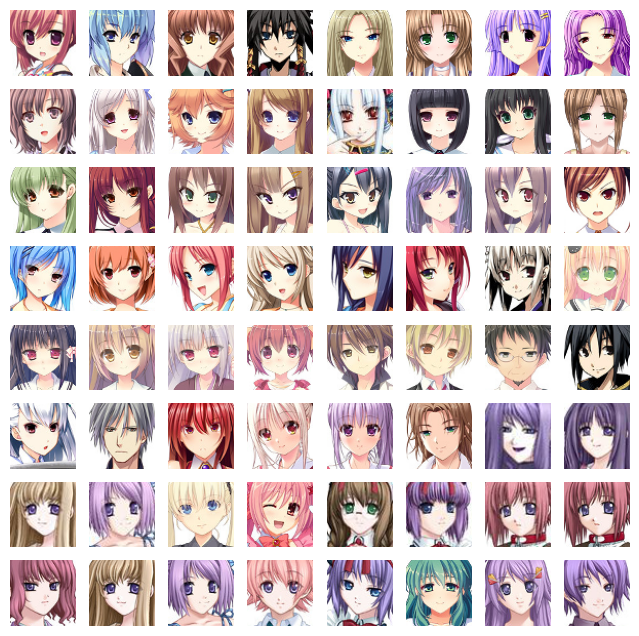

In [5]:
_,ax = plt.subplots(8,8, figsize = (8,8)) 
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(anime_images[10*i+j])
        ax[i,j].axis('off')

In [6]:
anime_images = np.array(anime_images)

In [7]:
print(anime_images.shape)

(21551, 64, 64, 3)


### AnimeGAN - Generative Adversarial Network for Anime Images

In [51]:
class AnimeGAN():
    def __init__(self):
        self.image_shape = (64, 64, 3) 
        self.noise_shape = (100,)
        
        self.binary_crossentropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        
    
    def GeneratorModel(self):
        model = tf.keras.Sequential()
        
        model.add(tf.keras.layers.Dense(4*4*512, activation='linear', input_shape = self.noise_shape, use_bias=False))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.LeakyReLU())
        
        model.add(tf.keras.layers.Reshape((4, 4, 512)))
        assert model.output_shape == (None, 4, 4, 512)
        
        model.add(tf.keras.layers.Conv2DTranspose(512, kernel_size=(4,4), strides=(2,2), padding='same', use_bias=False))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.LeakyReLU())
        assert model.output_shape == (None, 8, 8, 512)
        
        model.add(tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same', use_bias=False))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.LeakyReLU())
        assert model.output_shape == (None, 16, 16, 256)
        
        model.add(tf.keras.layers.Conv2DTranspose(128, kernel_size=(4,4), strides=(2,2), padding='same', use_bias=False))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.LeakyReLU())
        assert model.output_shape == (None, 32, 32, 128)
        
        model.add(tf.keras.layers.Conv2DTranspose(64, kernel_size=(4,4), strides=(2,2), padding='same', use_bias=False))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.LeakyReLU())
            
        model.add(tf.keras.layers.Conv2DTranspose(3, kernel_size=(4,4), strides=(1,1), padding='same', activation='tanh', use_bias=False))
        assert model.output_shape == (None, 64, 64, 3)
        
        return model
    
    def ImplementGenerator(self):
        generator = self.GeneratorModel()
        noise = tf.random.normal([1, 100])
        generated_image = generator(noise, training=False)
        return generated_image
    
    def DiscriminatorModel(self):
        model = tf.keras.Sequential()
        
        model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', input_shape = self.image_shape))
        model.add(tf.keras.layers.LeakyReLU(0.2))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPool2D((3,3)))
        model.add(tf.keras.layers.Dropout(0.2))
        
        model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
        model.add(tf.keras.layers.LeakyReLU(0.2))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.3))
        
        model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
        model.add(tf.keras.layers.LeakyReLU(0.2))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPool2D((3,3)))
        model.add(tf.keras.layers.Dropout(0.2))
        
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(256))
        model.add(tf.keras.layers.LeakyReLU(0.2))
        model.add(tf.keras.layers.Dense(128))
        model.add(tf.keras.layers.LeakyReLU(0.2))
        model.add(tf.keras.layers.Dense(1))
        
        return model
    
    def ImplementDiscriminator(self):
        discriminator = self.DiscriminatorModel()
        img = self.ImplementGenerator()
        plt.imshow(img[0,:,:,0], cmap='gray')
        decision = discriminator(img)
        print(decision)
        return decision
    
    def GeneratorLoss(self, fake_image):
        return self.binary_crossentropy(tf.ones_like(fake_image), fake_image)
    
    def DiscriminatorLoss(self, real_image, fake_image):
        real_loss = self.binary_crossentropy(tf.ones_like(real_image), real_image)
        fake_loss = self.binary_crossentropy(tf.zeros_like(fake_image), fake_image)
        total_loss = real_loss + fake_loss
        return total_loss
    
    def train():
        pass
    
    def SaveImages():
        pass

tf.Tensor([[0.00161405]], shape=(1, 1), dtype=float32)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00161405]], dtype=float32)>

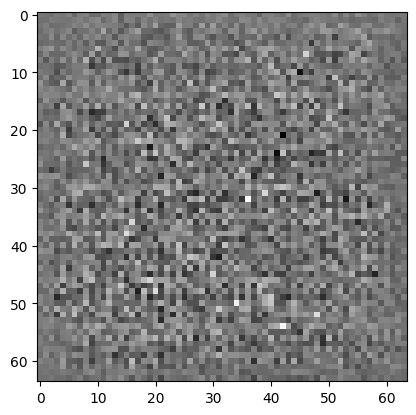

In [52]:
gan = AnimeGAN()
gan.ImplementDiscriminator()

### GIF of AnimeGAN

In [10]:
def CreateGIF():
    pass